# Υπερεκπαιδεύοντας τα Σπίτια

---

> Πάνος Λουρίδας, Αναπληρωτής Καθηγητής <br />
> Τμήμα Διοικητικής Επιστήμης και Τεχνολογίας <br />
> Οικονομικό Πανεπιστήμιο Αθηνών <br />
> louridas@aueb.gr

In [1]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras import layers

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

tf.random.set_seed(0) # for replicability purposes, not for production

* Για να δούμε πώς μπορούμε να κάνουμε πρόβλεψη μιας αριθμητικής τιμής, θα επιστρέψουμε στο γνώριμό μας σύνολο δεδομένων με τα σπίτια από την Καλιφόρνια.

In [2]:
california = fetch_california_housing(as_frame=True)
california.data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


* Θα τα χωρίσουμε σε δεδομένα εκπαίδευσης και ελέγχου.

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(california.data, 
                                                    california.target, 
                                                    test_size=0.20,
                                                    random_state=13)

* Θυμηθείτε ότι πρέπει να κανονικοποιήσουμε τα δεδομένα.

* Για το σκοπό αυτό μπορούμε στο TensorFlow να χρησιμοποιήσουμε το ειδικό στρώμα `Normalization`.

* Αυτό το χρησιμοποιούμε χρησιμοποιώντας τη μέθοδο `adapt()` στα δεδομένα εκπαίδευσης.

* Τότε θα διαβάσει τα δεδομένα και θα υπολογίσει το μέσο όρο, τη διακύμανση, και τον αριθμό των δεδομένων, για κάθε στήλη.

In [4]:
normalizer = layers.Normalization()
normalizer.adapt(np.array(X_train))
with np.printoptions(precision=2):
    print(normalizer.mean.numpy())
    print(normalizer.variance.numpy())
    print(normalizer.count.numpy())

[[ 3.86e+00  2.87e+01  5.43e+00  1.10e+00  1.43e+03  3.10e+00  3.57e+01
  -1.20e+02]]
[[3.58e+00 1.58e+02 6.53e+00 2.43e-01 1.33e+06 1.34e+02 4.60e+00 4.04e+00]]
0


* Ξεκινάμε με ένα μοντέλο με 32 νευρώνες σε ένα κρυμμένο στρώμα και έναν νευρώνα στο στρώμα εξόδου.

* Δεν δίνουμε συνάρτηση ενεργοποίησης στο στρώμα εξόδου αφού θέλουμε να προβλέψουμε την τιμή του σπιτιού, άρα να πάρουμε το αποτέλεσμα του νευρώνα χωρίς να το υποχρεώνουμε να είναι σε κάποια όρια τιμών.

* Την απώλεια θα την μετράμε με βάση το Μέσο Απόλυτο Λάθος.

In [5]:
model = keras.Sequential([
        normalizer,
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])

model.compile(loss='mean_absolute_error',
              optimizer=tf.keras.optimizers.Adam(0.001))

* Να το δούμε συνοπτικά.

* Παρατηρείστε ότι έχουμε παραμέτρους που δεν εκπαιδεύονται: είναι οι μέσοι όροι, οι διακυμάνσεις, και ο αριθμός των στοιχείων που έχει ήδη βρει το επίπεδο `Normalization`.

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (16512, 8)             │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (72.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 17 (72.00 B)

* Θα εκπαιδεύσουμε το μοντέλο μας για 100 εποχές.

* Σε κάθε εποχή τα τελευταία 20% των δεδομένων θα χρησιμοποιούνται για επικύρωση.

* Θα αποθηκεύσουμε την πορεία της εκπαίδευσης σε μία μεταβλητή `history`.

In [7]:
num_epochs = 100

history = model.fit(
    X_train, 
    y_train,
    epochs=num_epochs, 
    validation_split=0.2,
    verbose=1)

Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.2542 - val_loss: 0.5691
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5086 - val_loss: 0.4817
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4522 - val_loss: 0.4594
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4350 - val_loss: 0.4511
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4271 - val_loss: 0.4468
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4221 - val_loss: 0.4435
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4180 - val_loss: 0.4415
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4153 - val_loss: 0.4416
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4139 - val_loss: 0.4381
Epoch 10/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4109 - val_loss: 0.4379
Epoch 11/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4093 - val_loss: 0.4329
Epoch 12/100
413/413 ━━━━━━━━━━━━━━━━━━━━

* Η πορεία της εκπαίδευσης μας δείχνει την πρόοδο στην απώλεια εκπαίδευσης και στην απώλεια επικύρωσης, σε κάθε εποχή.

In [8]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

,loss,val_loss,epoch
0,0.869353,0.569088,0
1,0.492464,0.481695,1
2,0.450494,0.459416,2
3,0.436326,0.451117,3
4,0.429022,0.446755,4
...,...,...,...
95,0.360329,0.384864,95
96,0.360265,0.382127,96
97,0.360095,0.384675,97
98,0.360235,0.385241,98


* Μπορούμε να δούμε την εξέλιξη αν φτιάξουμε μια βοηθητική συνάρτηση για την απεικόνιση.

In [9]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

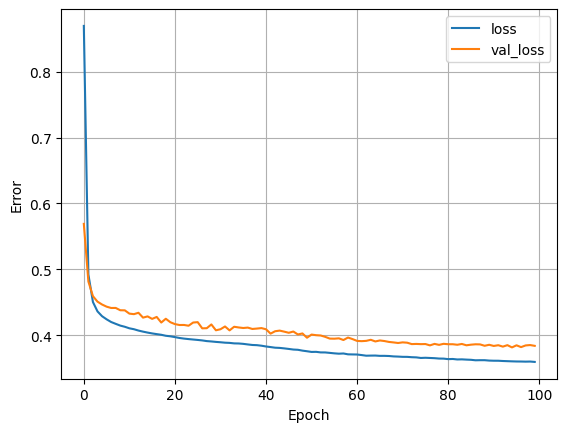

In [10]:
plot_loss(history)

* Βλέπουμε ότι η απώλεια στην επικύρωση αποκλίνει από την απώλεια εκπαίδευσης.

* Αυτό μπορεί να είναι δείγμα υπερπροσαρμογής.

* Αξιολογούμε το μοντέλο μας με βάση τα δεδομένα ελέγχου.

In [11]:
model.evaluate(X_test, y_test, verbose=0)

0.3835088014602661

* Ας δούμε αν θα τα πάμε καλύτερα με ένα μεγαλύτερο δίκτυο.

In [12]:
model = keras.Sequential([
        normalizer,
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])

model.compile(loss='mean_absolute_error',
              optimizer=tf.keras.optimizers.Adam(0.001))

* Συνοπτικά:

In [13]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (72.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 17 (72.00 B)

* Εκπαιδεύουμε:

In [14]:
history = model.fit(
    X_train, 
    y_train,
    epochs=num_epochs, 
    validation_split=0.2,
    verbose=1)

Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9094 - val_loss: 0.4840
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4518 - val_loss: 0.4505
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4226 - val_loss: 0.4375
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4086 - val_loss: 0.4370
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4030 - val_loss: 0.4254
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3924 - val_loss: 0.4226
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3859 - val_loss: 0.4178
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3811 - val_loss: 0.4072
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3744 - val_loss: 0.4109
Epoch 10/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3730 - val_loss: 0.4028
Epoch 11/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3679 - val_loss: 0.4000
Epoch 12/100
413/413 ━━━━━━━━━━━━━━━━━━━━

* Η αξιολόγησή του:

In [15]:
model.evaluate(X_test, y_test, verbose=0)

0.3388882875442505

* Τα πήγαμε μεν καλύτερα, αλλά οι δύο απώλειες άρχισαν να αποκλίνουν νωρίτερα.

* Επίσης, η απώλεια επικύρωσης δεν φαίνεται να βελτιώνεται σημαντικά από ένα σημείο και μετά.

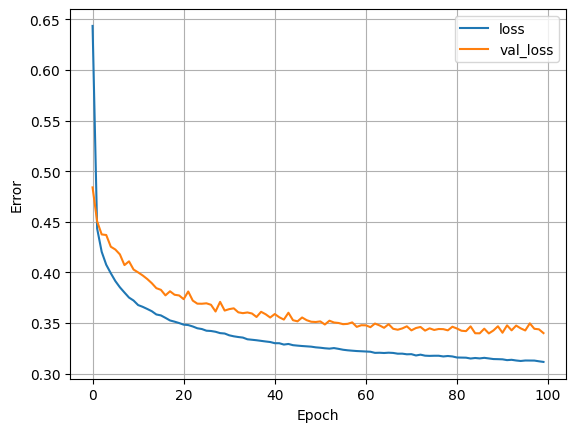

In [16]:
plot_loss(history)

* Προκειμένου να μην χάνουμε το χρόνο μας εκπαιδεύοντας το δίκτυο σε περισσότερες εποχές από όσες χρειάζεται, μπορούμε να χρησιμοποιήσουμε έναν μηχανισμό για πρόωρη διακοπή.

* Η εκπαίδευση θα διακοπεί αν δεν σημειωθεί βελτίωση σε δέκα εποχές.

In [17]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

* Ξαναφτιάχνουμε το μοντέλο μας.

In [18]:
model = keras.Sequential([
        normalizer,
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])

model.compile(loss='mean_absolute_error',
              optimizer=tf.keras.optimizers.Adam(0.001))

* Αυτή τη φορά του δίνουμε τον κανόνα πρόωρης διακοπής μέσω της παραμέτρου `callbacks`.

In [19]:
history = model.fit(
    X_train, 
    y_train,
    epochs=num_epochs, 
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stop])

Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7835 - val_loss: 0.4641
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4394 - val_loss: 0.4383
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4188 - val_loss: 0.4265
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4044 - val_loss: 0.4216
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3966 - val_loss: 0.4120
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3882 - val_loss: 0.4104
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3821 - val_loss: 0.4038
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3784 - val_loss: 0.3966
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3742 - val_loss: 0.3979
Epoch 10/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3714 - val_loss: 0.3956
Epoch 11/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3696 - val_loss: 0.3904
Epoch 12/100
413/413 ━━━━━━━━━━━━━━━━━━━━

* Πράγματι, σταματήσαμε πριν από τις 80 εποχές.

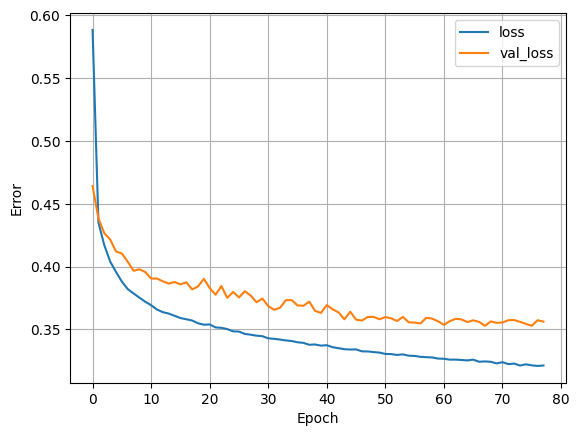

In [20]:
plot_loss(history)

* Η δε επίδοση του μοντέλου δεν επηρεάστηκε σημαντικά.

In [21]:
model.evaluate(X_test, y_test, verbose=0)

0.3580264151096344

* Ας φτιάξουμε τότε ένα ακόμα μεγαλύτερο μοντέλο να δούμε αν θα τα πάμε ακόμα καλύτερα.

In [22]:
model = keras.Sequential([
        normalizer,
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

model.compile(loss='mean_absolute_error',
              optimizer=tf.keras.optimizers.Adam(0.001))

* Εκπαιδεύουμε:

In [23]:
history = model.fit(
    X_train, 
    y_train,
    epochs=num_epochs, 
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stop])

Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.7291 - val_loss: 0.4536
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4281 - val_loss: 0.4321
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4083 - val_loss: 0.4262
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3965 - val_loss: 0.4161
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3864 - val_loss: 0.4051
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3774 - val_loss: 0.3950
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3696 - val_loss: 0.3986
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3666 - val_loss: 0.3857
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3599 - val_loss: 0.3861
Epoch 10/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3568 - val_loss: 0.3792
Epoch 11/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3539 - val_loss: 0.3770
Epoch 12/100
413/413 ━━━━━━━━━━━━━━━━━━━━

* Η απόκλιση μεταξύ των απωλειών μεγάλωσε ακόμα περισσότερο.

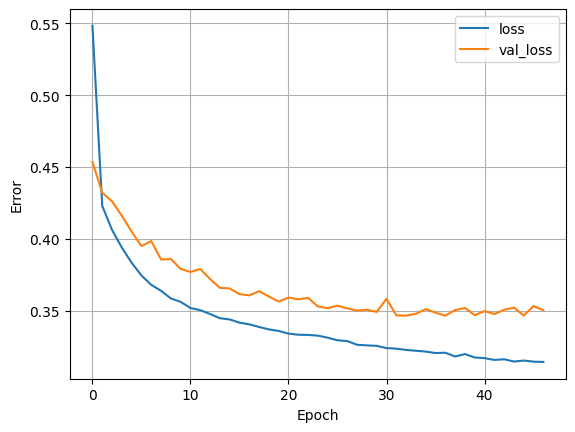

In [24]:
plot_loss(history)

* Η δε επίδοση έμεινε στα ίδια επίπεδα.

In [25]:
model.evaluate(X_test, y_test, verbose=0)

0.3470882475376129

* Και αν το μεγαλώσουμε ακόμα περισσότερο;

In [26]:
model = keras.Sequential([
        normalizer,
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

model.compile(loss='mean_absolute_error',
              optimizer=tf.keras.optimizers.Adam(0.001))

* Εκπαιδεύουμε:

In [27]:
history = model.fit(
    X_train, 
    y_train,
    epochs=num_epochs, 
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stop])

Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.6878 - val_loss: 0.4425
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4206 - val_loss: 0.4233
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3989 - val_loss: 0.4035
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3815 - val_loss: 0.3810
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3689 - val_loss: 0.3795
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3632 - val_loss: 0.3736
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3585 - val_loss: 0.3648
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3504 - val_loss: 0.3669
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3486 - val_loss: 0.3659
Epoch 10/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3441 - val_loss: 0.3595
Epoch 11/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3427 - val_loss: 0.3557
Epoch 12/100
413/413 ━━━━━━━━━━━━━━━━━━━━

* Εδώ κι αν μεγάλωσε η απόκλιση!

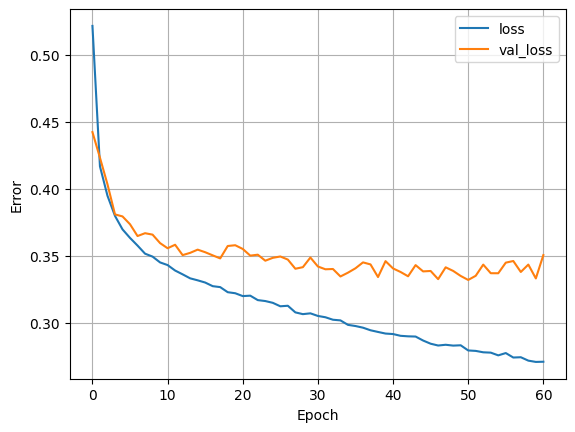

In [28]:
plot_loss(history)

* Και η επίδοση στα ίδια (ή μάλλον ανεπαίσθητα χειρότερα).

In [29]:
model.evaluate(X_test, y_test, verbose=0)

0.3501296937465668

* Γιατί συμβαίνει αυτό;

* Ας δούμε το μοντέλο.

In [30]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,582 (510.09 KB)

 Trainable params: 43,521 (170.00 KB)

 Non-trainable params: 17 (72.00 B)

 Optimizer params: 87,044 (340.02 KB)

* Έχουμε φτιάξει ένα μοντέλο που έχει περισσότερες παραμέτρους από όσα είναι τα δείγματά μας.

* Το μοντέλο παραείναι ισχυρό για τα δεδομένα που έχουμε στη διάθεσή μας.

* Ένα τέτοιο μοντέλο μπορεί να πέσει θύμα της υπερπροσαρμογής.

In [31]:
model.count_params()

43538

* Προσοχή! Όταν φτιάχνουμε νευρωνικά δίκτυα, δεν προσθέτουμε τυφλά στρώματα και νευρώνες.

* Τελικά αυτό που θα πετύχουμε είναι να φτιάξουμε ένα δίκτυο με τόσους νευρώνες και συνδέσεις ώστε πολύ γρήγορα θα αρχίσει να παπαγαλίζει τα δεδομένα.

* Πρέπει να διαστασιολογούμε το δίκτυο με βάση τον όγκο των δεδομένων του προβλήματός μας.

* Τα αποτελέσματα είναι αντίστοιχα (ίσως λίγο χειρότερα, αλλά δεν ψάξαμε τις υπερπαραμέτρους) με αυτά που πετύχαμε μέσω δένδρων αποφάσεων.

* Όπως μπορούμε να διαπιστώσουμε όμως, η εκπαίδευση των νευρωνικών δικτύων μπορεί να χρειάζεται περισσότερους πόρους.

* Επίσης όπως μπορούμε να διαπιστώσουμε, δεν έχουμε την ερμηνευσιμότητα που μπορούμε να έχουμε με άλλες μεθόδους.